In [7]:
import transit_model as tm
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
g, passengers = tm.initialize(n_passengers=100, node_capacity=1000)

since there are 140 nodes, we expect crowding effects to happen when `n_passengers/140 >=  node_capacity`

In [3]:
n_passengers = 10000
node_cap_range = [100, 75, 50, 25, 20, 15, 10, 5]

replicates = 3
max_steps = 1e3

print(n_passengers/len(g.nodes))

capacities = []
transit_times = []

for n in node_cap_range:
    print(f'running simulations for node_capacity = {n}')
    for r in range(replicates):
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=n)
        temp_transit_times = tm.update(g=g,
                                       passengers=passengers,
                                       max_run_steps=max_steps)
        if len(temp_transit_times) == n_passengers:
            transit_times.extend(temp_transit_times)
            capacities.extend([n]*len(temp_transit_times))
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')

71.42857142857143
running simulations for node_capacity = 100
running simulations for node_capacity = 75
running simulations for node_capacity = 50
running simulations for node_capacity = 25
running simulations for node_capacity = 20
running simulations for node_capacity = 15
running simulations for node_capacity = 10
running simulations for node_capacity = 5


In [8]:
capacity_dict = {'capacities':capacities, 'transit_times':transit_times}

data = pd.DataFrame.from_dict(capacity_dict)
data

,capacities,transit_times
0,100,1
1,100,1
2,100,1
3,100,1
4,100,1
...,...,...
239995,5,426
239996,5,426
239997,5,426
239998,5,432


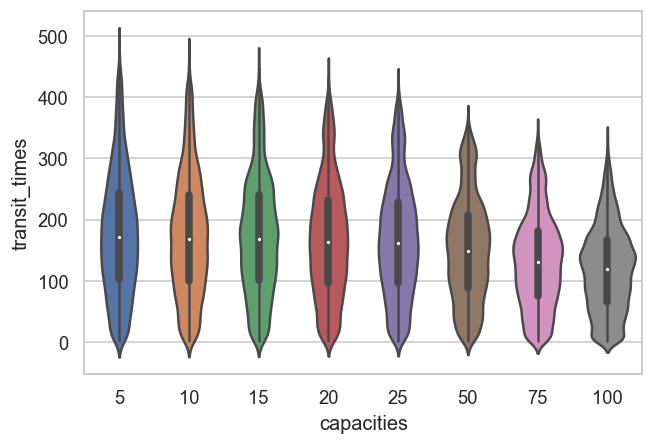

In [9]:
import seaborn as sns
import pandas as pd 
sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.violinplot(x='capacities', y='transit_times', data=data, alpha=0.5, saturation=0.8)
plt.show()